<a href="https://colab.research.google.com/github/gagarma/predicciones_ventas_productos_alimenticios/blob/main/Sales_Prediction_Food.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PREDICCIONES DE VENTAS PARA LA CADENA DE ALIMENTOS
Gustavo Garma

Primero comenzamos con el trabajo pre-operativo el cual es montar mi drive e importar las librerias a usar.

In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px

Luego montamos el archivo base en formato csv y realizamos un head para dar un vistazo general de la base

In [3]:
archivo = "/content/drive/MyDrive/sales_predictions.csv"
df = pd.read_csv(archivo)
df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


**De primera vista logramos visualizar algunos nulos en la columna Item_Weight y Outlet_Size, por lo que habra que investigar más a fondo.**

### Limpieza de DataFrame

Primero realizamos un info y un describe para ver la cantidad de nulos en las columnas.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [6]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**Con la función isnull vemos que hay 1463 nulos en Item_Weight y 2410 nulos en Outlet_Size. Con la función describe no notamos nada fuera de lo normal, por lo que habra que revisar columna a columna.**

In [7]:
  df[df.duplicated()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


**Tambien aplicamos un duplicated para verificar si hay datos duplicados en las filas y vemos que no hay ningún duplicado, por lo que este apartado esta bien.**

### Columna 1: Item_Identifier

In [8]:
df["Item_Identifier"].value_counts()

FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

**Todo esta conforme en esta columna**

### Columna 2: Item_Weight



In [9]:
df["Item_Weight"].value_counts(dropna=False)

NaN       1463
12.150      86
17.600      82
13.650      77
11.800      76
          ... 
7.275        2
7.685        1
9.420        1
6.520        1
5.400        1
Name: Item_Weight, Length: 416, dtype: int64

Aqui podemos ver que hay 1463 valores nulos de 8523, dado que no hay forma de saber el peso de estos productos (porque se dividen en código y no en nombres) y dado que es una columna importante que nos puede relacionar si el peso es una variable importante o no al momento de la compra lo mejor es eliminar estos valores nulos, ya que representan el 17% del total.

In [10]:
df = df.dropna(subset=['Item_Weight'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Size                4650 non-null   object 
 9   Outlet_Location_Type       7060 non-null   object 
 10  Outlet_Type                7060 non-null   object 
 11  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 717.0+ KB


**Se borraron las filas con valores nulos, por lo que se realizo un info para visualizar como quedaria nuestro Dataframe.**

### Columna 3: Item_Fat_Content

In [11]:
df["Item_Fat_Content"].value_counts()

Low Fat    4222
Regular    2388
LF          260
reg         106
low fat      84
Name: Item_Fat_Content, dtype: int64

En esta columna solo deberia haber 2 categorias: Low Fat y Regular, sin embargo, vemos que hay 3 categorías más LF, reg y low fat. Por ello, asumiremos que LF se refiere a Low Fat, reg a Regular y low fat se colocó en minusculas, por lo que deberia ser Low Fat. Con esta información completa cambiaremos los nombres de estas filas.

In [12]:
df["Item_Fat_Content"].replace("LF","Low Fat",inplace=True)

In [13]:
df["Item_Fat_Content"].replace("reg","Regular",inplace=True)

In [14]:
df["Item_Fat_Content"].replace("low fat","Low Fat",inplace=True)

In [15]:
df["Item_Fat_Content"].value_counts()

Low Fat    4566
Regular    2494
Name: Item_Fat_Content, dtype: int64

**Con estas acciones y realizando un segundo value counts podemos visualizar que esta columna ha sido corregida.**

### Columna 4: Item_Visibility

In [16]:
df["Item_Visibility"].value_counts()

0.000000    436
0.076975      3
0.187841      2
0.059940      2
0.026355      2
           ... 
0.043122      1
0.169139      1
0.009411      1
0.098822      1
0.044878      1
Name: Item_Visibility, Length: 6519, dtype: int64

Podemos ver que hay 436 productoscon 0% de visibilidad, quizas se deba a que no lo venden de forma física y solo virtual, por ello, esta columna se quedará de esta forma.

### Columna 5: Item_Type

In [17]:
df["Item_Type"].value_counts()

Fruits and Vegetables    1019
Snack Foods               988
Household                 759
Frozen Foods              718
Dairy                     566
Canned                    539
Baking Goods              536
Health and Hygiene        430
Soft Drinks               374
Meat                      337
Breads                    204
Hard Drinks               183
Others                    137
Starchy Foods             130
Breakfast                  89
Seafood                    51
Name: Item_Type, dtype: int64

**Todo esta conforme en esta columna.**

### Columna 6: Item_MRP

In [18]:
df["Item_MRP"].value_counts()

170.5422    6
142.0154    6
196.5768    6
49.8008     5
172.0422    5
           ..
172.9764    1
55.3614     1
177.8028    1
65.6826     1
75.4670     1
Name: Item_MRP, Length: 5225, dtype: int64

**Todo esta conforme en esta columna.**

### Columna 7: Outlet_Identifier

In [19]:
df["Outlet_Identifier"].value_counts()

OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

**Todo esta conforme en esta columna**

### Columna 8: Outlet_Establishment_Year

In [20]:
df["Outlet_Establishment_Year"].value_counts()

1987    932
1999    930
1997    930
2004    930
2002    929
2009    928
2007    926
1998    555
Name: Outlet_Establishment_Year, dtype: int64

**Todo esta conforme en esta columna**

### Columna 9: Outlet_Size

In [21]:
df["Outlet_Size"].value_counts(dropna=False)

NaN       2410
Small     1860
Medium    1858
High       932
Name: Outlet_Size, dtype: int64

**Vemos que en esta columna hay 2410 nulos, representando casi el 40% de la columna, dado que no hay ninguna relación con las demas columnas como outlet_type o outlet_size y a pesar que seria interesante saber donde prefieren comprar las personas lo mejor es borrar la columna para que no nos genere malinformación.**

In [22]:
df.drop(columns=["Outlet_Size"],inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7060 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            7060 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           7060 non-null   object 
 3   Item_Visibility            7060 non-null   float64
 4   Item_Type                  7060 non-null   object 
 5   Item_MRP                   7060 non-null   float64
 6   Outlet_Identifier          7060 non-null   object 
 7   Outlet_Establishment_Year  7060 non-null   int64  
 8   Outlet_Location_Type       7060 non-null   object 
 9   Outlet_Type                7060 non-null   object 
 10  Item_Outlet_Sales          7060 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 661.9+ KB


**Vemos que todo ha quedado conforme luego de eliminar esta columna.**

### Columna 10: Outlet_Location_Type

In [24]:
df["Outlet_Location_Type"].value_counts()

Tier 2    2785
Tier 3    2415
Tier 1    1860
Name: Outlet_Location_Type, dtype: int64

**Todo esta conforme en esta columna.**

### Columna 11: Outlet_Type

In [25]:
df["Outlet_Type"].value_counts()

Supermarket Type1    5577
Supermarket Type2     928
Grocery Store         555
Name: Outlet_Type, dtype: int64

**Todo esta conforme en esta columna.**

### Columna 12: Item_Outlet_Sales



In [26]:
df["Item_Outlet_Sales"].value_counts()

958.7520     16
1342.2528    15
703.0848     15
1230.3984    14
1278.3360    13
             ..
1524.0162     1
4756.4752     1
63.2510       1
5800.4496     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3066, dtype: int64

**Todo esta conforme en esta columna.**

**De esta forma hemos culminado con la limpieza de nuestro DataFrame y obtenemos una base en la que podremos encontrar mucha información y predecir el comportamiento de estas variables y de las ventas de productos alimenticios segun sus distintas caracteristicas.**

### Visualizaciones:


**Visualización 1**

In [48]:
filtro1=df[df["Item_Fat_Content"]=="Low Fat"]

In [47]:
filtro2=df[df["Item_Fat_Content"]=="Regular"]

In [53]:
g1=filtro1.groupby(["Item_Type"])[["Item_Outlet_Sales"]].sum().reset_index().round(2)
g1

,Item_Type,Item_Outlet_Sales
0,Baking Goods,465450.13
1,Breads,241782.61
2,Breakfast,75590.27
3,Canned,609586.51
4,Dairy,759479.39
5,Frozen Foods,777248.93
6,Fruits and Vegetables,1062656.08
7,Hard Drinks,377067.17
8,Health and Hygiene,835170.86
9,Household,1659037.11


In [54]:
g2=filtro2.groupby(["Item_Type"])[["Item_Outlet_Sales"]].sum().reset_index().round(2)
g2

,Item_Type,Item_Outlet_Sales
0,Baking Goods,561769.42
1,Breads,195988.22
2,Breakfast,102513.89
3,Canned,545675.03
4,Dairy,484653.13
5,Frozen Foods,716960.74
6,Fruits and Vegetables,1157321.52
7,Meat,437505.17
8,Seafood,72539.58
9,Snack Foods,876215.44


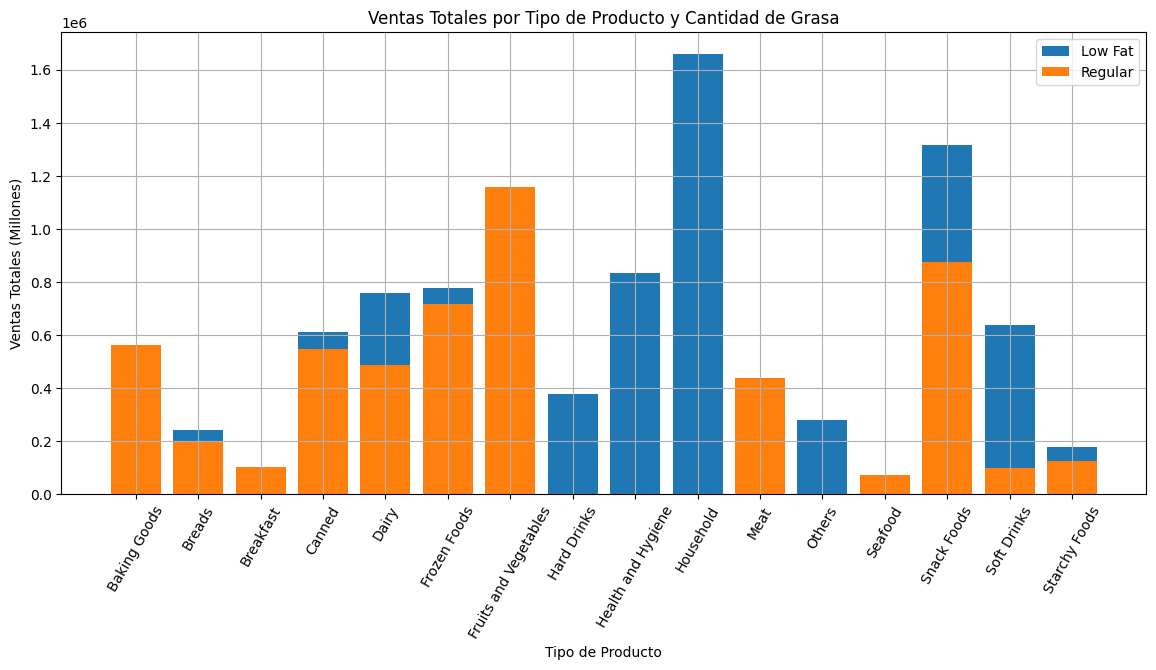

In [62]:
plt.figure(figsize=(14,6))
plt.bar(g1["Item_Type"],g1['Item_Outlet_Sales'],label="Low Fat")
plt.bar(g2["Item_Type"],g2['Item_Outlet_Sales'],label="Regular")
plt.ylabel("Ventas Totales (Millones)")
plt.xlabel("Tipo de Producto")
plt.title("Ventas Totales por Tipo de Producto y Cantidad de Grasa")
plt.xticks(rotation=60)
plt.yticks(range(0,1700000,200000))
plt.grid()
plt.legend()
plt.show()

**En el siguiente gráfico podemos apreciar que en todos los productos las ventas de productos bajos en grasa superan a los productos regulares, esto deja de manifiesto que los productos bajo en grasa se han vuelto muy populares ultimamente, eso se demuestra en sus ventas.**

**Visualización 2**

In [81]:
g3=filtro1.groupby(["Outlet_Establishment_Year"])[["Item_Outlet_Sales"]].mean().reset_index()
g3

,Outlet_Establishment_Year,Item_Outlet_Sales
0,1987,2326.733685
1,1997,2211.052771
2,1998,347.261992
3,1999,2333.092785
4,2002,2123.467973
5,2004,2428.540658
6,2007,2306.228079
7,2009,2008.871133


In [82]:
g4=filtro2.groupby(["Outlet_Establishment_Year"])[["Item_Outlet_Sales"]].mean().reset_index()
g4

,Outlet_Establishment_Year,Item_Outlet_Sales
0,1987,2247.432408
1,1997,2398.149432
2,1998,324.862843
3,1999,2375.588354
4,2002,2323.542130
5,2004,2458.108941
6,2007,2402.306671
7,2009,1971.266341


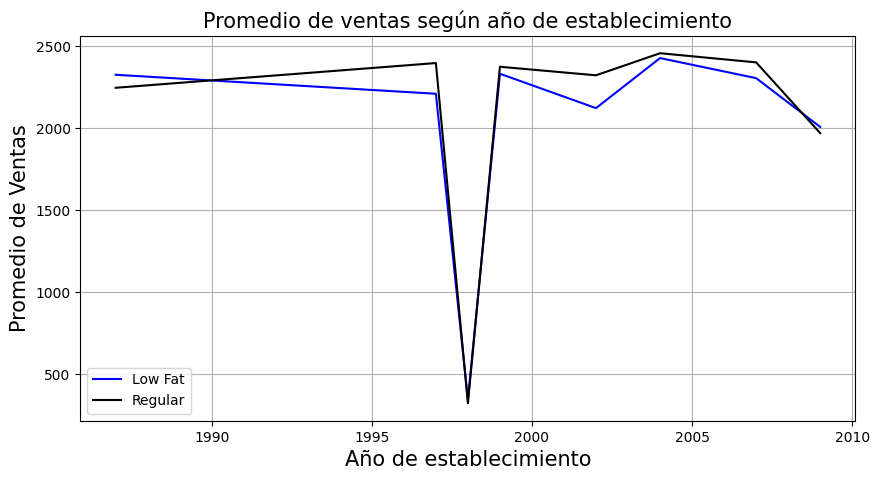

In [84]:
plt.figure(figsize=(10,5))
plt.plot(g3["Outlet_Establishment_Year"],g3['Item_Outlet_Sales'],color="blue",label="Low Fat")
plt.plot(g4["Outlet_Establishment_Year"],g4['Item_Outlet_Sales'],color="k",label="Regular")
plt.ylabel("Promedio de Ventas", fontsize = 15)
plt.xlabel("Año de establecimiento", fontsize =15)
plt.title("Promedio de ventas según año de establecimiento", fontsize=15)
plt.grid()
plt.legend()
plt.show()

**Como vemos, el año de establecimiento no es un factor importante para las ventas en ninguno de los 2 tipos de productos. A excepción de año 1998, que hubo una disminución tremenda en ese año, esto demuestra que en ese año se establecieron muy pocos mercados, por lo que su promedio fue muy bajo.**

**Visualización 3**

In [99]:
g5=df.groupby(["Outlet_Location_Type"])[["Item_Outlet_Sales"]].mean().reset_index().round(2)
g5

,Outlet_Location_Type,Item_Outlet_Sales
0,Tier 1,2313.10
1,Tier 2,2323.99
2,Tier 3,1732.02


<ipython-input-100-e8dd3066c46e>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


<function matplotlib.pyplot.show(close=None, block=None)>

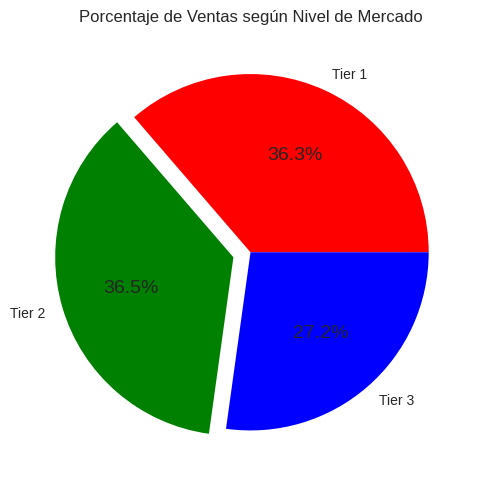

In [100]:
plt.pie(g5["Item_Outlet_Sales"].values,labels = g5["Outlet_Location_Type"], autopct="%1.1f%%", colors=['red', 'green', 'blue'], explode=[0, 0.1, 0])
plt.style.use('seaborn')
plt.title('Porcentaje de Ventas según Nivel de Mercado')
plt.show

**Vemos que en promedio Nivel 1 y 2 generan mayor cantidad de ventas en promedio que el nivel 3 ganandole en casi 10% cada una, esto se puede deber a que en este nivel los mercados son mas pequeños.**